In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df = df.dropna(axis= 0)
df.shape

(6362620, 11)

In [34]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [32]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:>

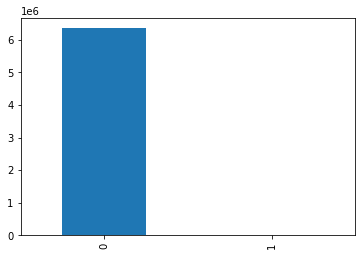

In [33]:
df['isFraud'].value_counts().plot(kind= 'bar')

In [13]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [30]:
type_isFraud = df.groupby(['type', 'isFraud']).size().to_frame()
type_isFraud

0
type     isFraud         
CASH_IN  0        1399284
CASH_OUT 0        2233384
         1           4116
DEBIT    0          41432
PAYMENT  0        2151495
TRANSFER 0         528812
         1           4097

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'].unique())
df['type'].unique()

array([3, 4, 1, 2, 0])

In [8]:
df['type'] = le.transform(df['type'])
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [9]:
df[df['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,4,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,1,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,4,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [10]:
drop_features = ['step', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']
X = df.drop(drop_features, axis= 1)
y = df['isFraud']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4453834, 6)
(1908786, 6)
(4453834,)
(1908786,)


In [14]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
prediction_logistic = model_logistic.predict(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators= 10, max_depth= 5)
model_random_forest.fit(X_train, y_train)
prediction_random_forest = model_random_forest.predict(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(max_depth= 5)
model_decision_tree.fit(X_train, y_train)
prediction_decision_tree = model_decision_tree.predict(X_test)

In [17]:
# from sklearn.svm import SVC
# model_svc = SVC()
# model_svc.fit(X_train, y_train)
# prediction_model_svc = model_svc.predict(X_test)

In [18]:
# from sklearn.neural_network import MLPClassifier
# model_nn_sklearn = MLPClassifier(hidden_layer_sizes= (82, 41), activation= 'relu', solver= 'adam', max_iter= 50)
# model_nn_sklearn.fit(X_train, y_train)
# prediction_model_nn_sklearn = model_nn_sklearn.predict(X_test)

In [19]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_ANN = Sequential()
# hidden layers
model_ANN.add(Dense(units= 82, activation= 'relu'))
model_ANN.add(Dropout(0.2))
model_ANN.add(Dense(units= 41, activation= 'relu'))
model_ANN.add(Dropout(0.2))
#output layers
model_ANN.add(Dense(units= 2, activation= 'softmax'))

model_ANN.compile(optimizer= 'adam', loss= SparseCategoricalCrossentropy(from_logits= True), metrics= ['accuracy'])
model_ANN.fit(X_train, y_train, epochs= 50, batch_size= 54437)
prediction_ANN = model_ANN.predict(X_test)
prediction_ANN = [np.argmax(x) for x in prediction_ANN]

Epoch 1/50


C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


82/82 [==============================] - 35s 408ms/step - loss: 12403.2158 - accuracy: 0.9439
Epoch 2/50
82/82 [==============================] - 35s 431ms/step - loss: 901.6971 - accuracy: 0.9654
Epoch 3/50
82/82 [==============================] - 31s 380ms/step - loss: 609.2667 - accuracy: 0.9757
Epoch 4/50
82/82 [==============================] - 31s 381ms/step - loss: 457.7544 - accuracy: 0.9768
Epoch 5/50
82/82 [==============================] - 30s 371ms/step - loss: 296.2412 - accuracy: 0.9778
Epoch 6/50
82/82 [==============================] - 30s 360ms/step - loss: 207.1529 - accuracy: 0.9804
Epoch 7/50
82/82 [==============================] - 30s 370ms/step - loss: 147.6200 - accuracy: 0.9882
Epoch 8/50
82/82 [==============================] - 30s 367ms/step - loss: 78.5782 - accuracy: 0.9917
Epoch 9/50
82/82 [==============================] - 29s 358ms/step - loss: 49.0151 - accuracy: 0.9941
Epoch 10/50
82/82 [==============================] - 29s 352ms/step - loss: 34.3464 

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print('Accuracy score random forest:', accuracy_score(y_test, prediction_random_forest))
print('Accuracy score logistic:', accuracy_score(y_test, prediction_logistic))
print('Accuracy score decision tree:', accuracy_score(y_test, prediction_decision_tree))
print('Accuracy score ANN:', accuracy_score(y_test, prediction_ANN))

Accuracy score random forest: 0.9991727726418781
Accuracy score logistic: 0.9976052841963426
Accuracy score decision tree: 0.9994970625308442
Accuracy score ANN: 0.9986761218910868


In [31]:
import joblib
filename = 'model.pkl'
joblib.dump(model_logistic, filename)

['model.pkl']